
# Tập dữ liệu

Dự án này liên quan đến tập dữ liệu College, trong file College.csv trong thư mục dữ liệu. Nó chứa các biến sau cho 777 trường đại học và cao đẳng khác nhau ở Mỹ:

**Private**: Chỉ báo public/private

**Apps**: Số lượng hồ sơ nhận được

**Accept**: Số lượng sinh viên được chấp thuận

**Enroll**: Số sinh viên mới đăng ký

**Top10perc**: Sinh viên mới từ top 10% lớp trung học

**Top25perc**: Sinh viên mới từ top 25% lớp trung học

**F.Undergrad**: Số sinh viên đại học toàn thời gian

**P.Undergrad**: Số sinh viên đại học bán thời gian

**Outstate**: Học phí ngoại bang

**Room.Board**: Chi phí ăn ở

**Books**: Chi phí giáo trình theo ước tính

**Personal**: Chi tiêu cá nhân theo ước tính

**PhD**: Phần trăm giảng viên có bằng Tiến sĩ

**Terminal**: Phần trăm giảng viên có Terminal degree (bẳng cấp cao nhất trong một lĩnh vực nhất định)

**S.F.Ratio**: Tỷ lệ sinh viên/giảng viên

**perc.alumni**: Phần trăm cựu sinh viên đã quyên góp

**Expend**: Chi phí giảng dạy cho mỗi sinh viên

**Grad.Rate**: Tỷ lệ tốt nghiệp

# Thư viện và hàm cần thiết

In [1]:
### Thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings('ignore')

matplotlib.style.use('ggplot')

In [2]:
# Hàm vẽ biểu đồ hồi quy khi X_test có 1 đặc trưng
# và hiển thị hệ số R2
def drawLine(model, X_test, y_test, title):
    y_pred = model.predict(X_test)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X_test, y_test, c='g', marker='o')
    ax.plot(X_test, y_pred, color='orange', linewidth=1, alpha=0.7)
    ax.set_xlabel(feature)
    ax.set_ylabel('Accept')

    R2 = r2_score(y_test, y_pred)

    ax.set_title(title)
    print("R2: " + str(R2))
    print("Intercept(s): ", model.intercept_)

    plt.show()

In [3]:
# Hàm vẽ biểu đồ hồi quy khi X_test có 2 đặc trưng
# và hiển thị hệ số R2

def drawPlane(model, X_test, y_test, title):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_zlabel('prediction')

    
    # Chuyển về numpy vì X_test có thể là DataFrame, v.v.
    X_test = np.array(X_test)
    col1 = X_test[:,0]
    col2 = X_test[:,1]

    
    # Lấy giá trị nhỏ nhất và lớn nhất của 2 đặc trưng
    # để vẽ siêu mặt phẳng   
    # do điểm nhỏ nhất và lớn nhất sẽ bao bọc toàn bộ dữ liệu
    x_min, x_max = col1.min(), col1.max()
    y_min, y_max = col2.min(), col2.max()
    x = np.arange(x_min, x_max, (x_max-x_min) / 10)
    y = np.arange(y_min, y_max, (y_max-y_min) / 10)
    x, y = np.meshgrid(x, y)

    
    # Dự đoán để lấy siêu mặt phẳng
    z = model.predict(np.c_[x.ravel(), y.ravel()])
    z = z.reshape(x.shape)

    # Trực quan hóa dữ liệu và vẽ siêu mặt phẳng
    ax.scatter(col1, col2, y_test, c='g', marker='o')
    ax.plot_wireframe(x, y, z, color='orange', alpha=0.7)

    R2 = r2_score(y_test, y_pred)

    ax.set_title(title)
    print("R2: " + str(R2))
    print("Intercept(s): ", model.intercept_)

    plt.show()

# Task 1: Đọc dữ liệu từ tập dữ liệu College

In [4]:
# Chỉ mục là cột tên trường đại học

df = pd.read_csv('College.csv', index_col = 0)
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


# Task 2: Mã hóa hạng mục

In [5]:
# Sử dụng map() để chuyển đổi cột Private thành {'Yes':1, 'No':0}

df['Private'] = df['Private'].map({'Yes':1, 'No':0})
df

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,0,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,1,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,1,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,1,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


# Task 3: Trực quan ma trận tương quan

In [6]:
# Tính toán ma trận trực quan từ DataFrame

corr = df.corr()
corr

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Private,1.000000,-0.432095,-0.475252,-0.567908,0.164132,0.095752,-0.615561,-0.452088,0.552650,0.340532,-0.018549,-0.304485,-0.156714,-0.129620,-0.472205,0.414775,0.258461,0.336162
Apps,-0.432095,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,-0.475252,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,-0.567908,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.164132,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.095752,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,-0.615561,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,-0.452088,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.552650,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.340532,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942


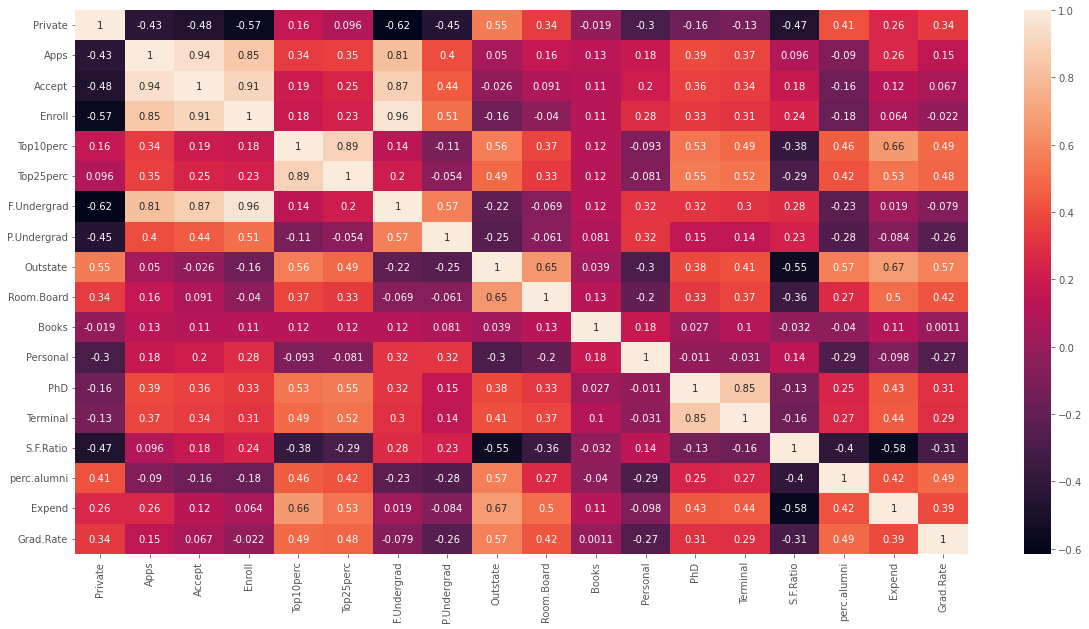

In [7]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot = True); # annot dùng để hiện tên và giá trị của heatmap

# Task 4: Vẽ biểu đồ Scatter từng đặc trưng với mục tiêu

In [8]:
# Lấy ra toàn bộ đặc trưng từ dữ liệu và loại bỏ đi mục tiêu ("Accept")
df_droped = df.drop(columns = 'Accept')
df_droped.columns

Index(['Private', 'Apps', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

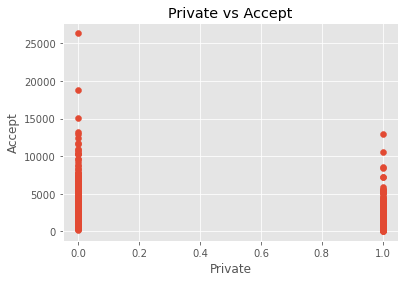

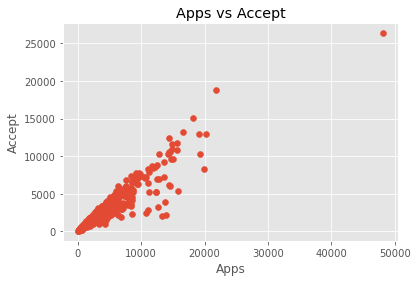

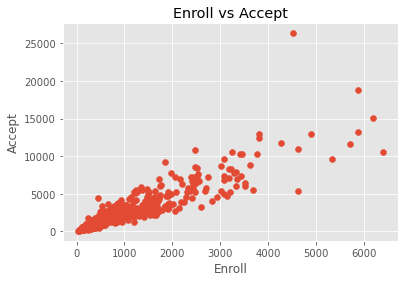

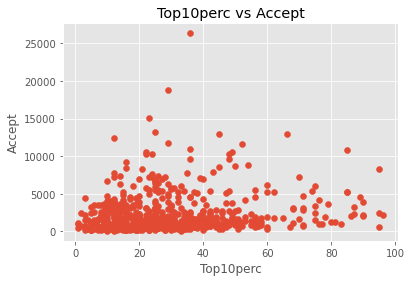

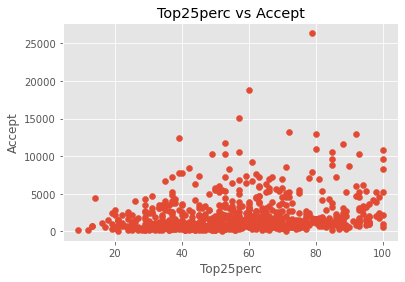

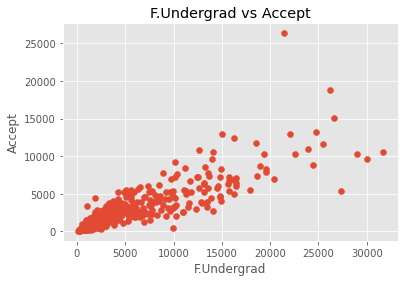

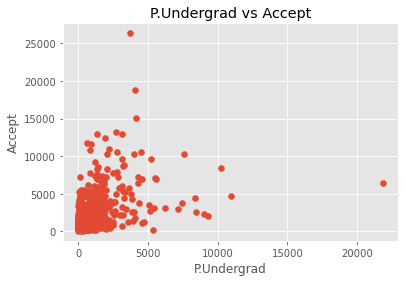

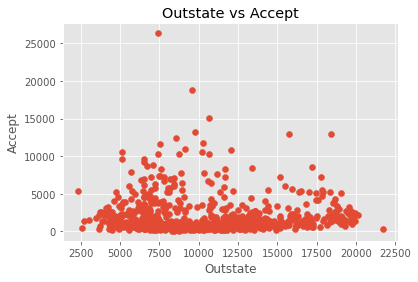

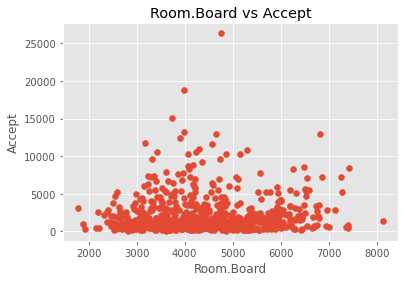

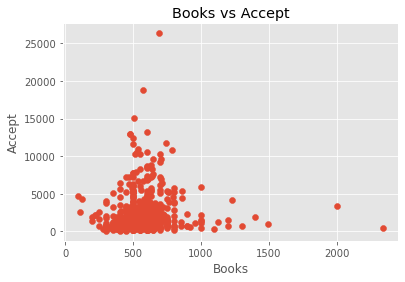

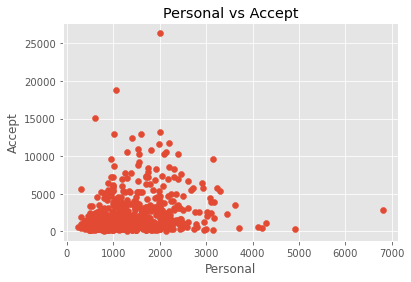

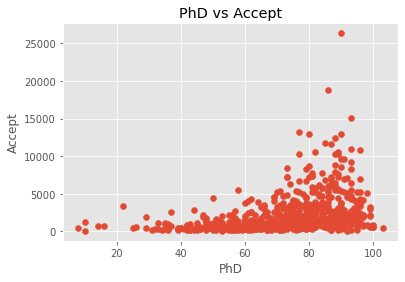

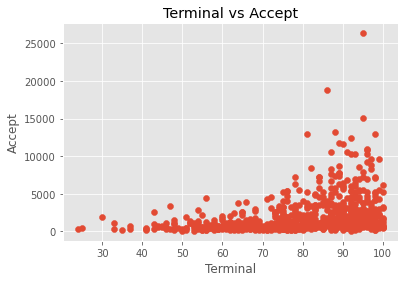

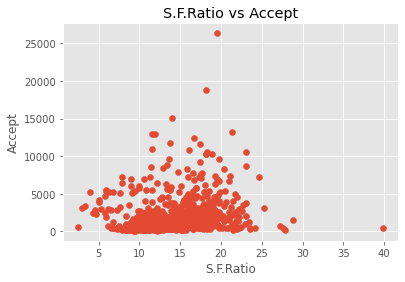

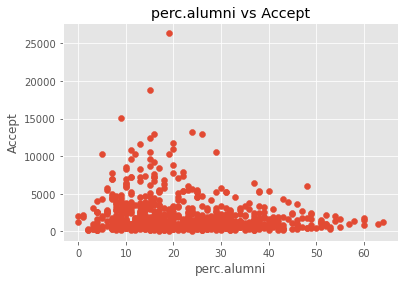

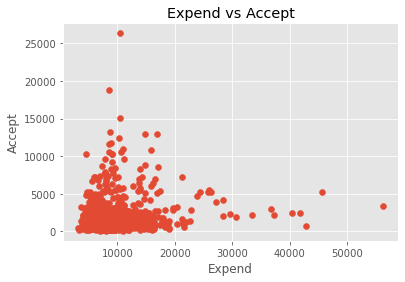

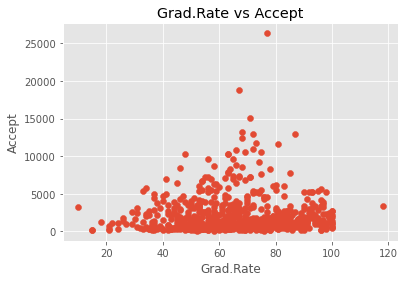

In [9]:
# Trực quan từng đặc trưng với mục tiêu
for col in df_droped.columns:
    fig = plt.figure()
    plt.scatter(df[col], df['Accept'])
    plt.ylabel("Accept")
    plt.xlabel(col)
    plt.title('{} vs Accept'.format(col))
    plt.show()

# Task 5: Phân tách dữ liệu đặc trưng vào X, dữ liệu mục tiêu vào y từ dữ liệu gốc

In [10]:
X = df_droped
y = df['Accept']

X.head()

,Private,Apps,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,1660,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [11]:
y.head()

Abilene Christian University    1232
Adelphi University              1924
Adrian College                  1097
Agnes Scott College              349
Alaska Pacific University        146
Name: Accept, dtype: int64

# Task 6: Tách dữ liệu thành train/test data

In [12]:
# Dữ liệu train chiếm 70% và random_state là 7

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 7)

# Task 7: Mô hình hóa hồi quy tuyến tính chi phí ăn ở và số lượng sinh viên được chấp nhận và trực quan mô hình

Tách dữ liệu chi phí ăn ở 'Room.Board' từ bộ train và test

In [13]:
X_train_rb = X_train['Room.Board']
X_test_rb = X_test['Room.Board']
y_train_rb = y_train
y_test_rb = y_test

Điều chỉnh shape dữ liệu phù hợp với đầu vào của mô hình

Mô hình hồi quy tuyến tính yêu cầu đầu vào có dạng là (m, n) với X và (m, 1) với y.

Trong đó:

- m là số lượng mẫu quan sát

- n là số lượng đặc trưng

Với một đặc trưng duy nhất, shape phù hợp sẽ là (m, 1) cho X.

In [14]:
X_train_rb = np.array(X_train_rb).reshape(-1, 1)
X_test_rb = np.array(X_test_rb).reshape(-1, 1)

Xây dựng và huấn luyện mô hình

In [15]:
from sklearn import linear_model
model_1 = linear_model.LinearRegression()
model_1.fit(X_train_rb, y_train_rb)

LinearRegression()

Đánh giá chất lượng mô hình bằng chỉ số R2 cho tập test

In [16]:
y_pred = model_1.predict(X_test_rb)
score = r2_score(y_test_rb, y_pred)
score

-0.0026669864145500988

Trực quan mô hình hóa với dữ liệu test

R2: -0.0026669864145500988
Intercept(s):  1340.6195651898383


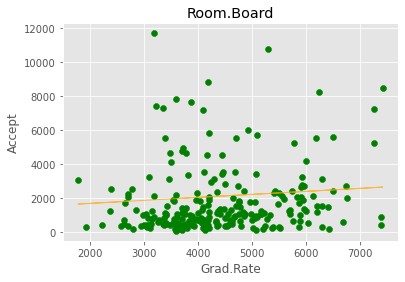

In [17]:
feature = 'Grad.Rate'
drawLine(model_1, X_test_rb, y_test_rb, 'Room.Board')

# Task 8: Mô hình hóa hồi quy tuyến tính số lượng sinh viên ghi danh cho mỗi trường đại học và số lượng sinh viên được chấp nhận và trực quan mô hình

Tách dữ liệu số lượng sinh viên ghi danh **"enroll"** cho mỗi trường đại học ở từ bộ train và test

In [18]:
X_train_en = X_train['Enroll']
X_test_en = X_test['Enroll']
y_train_en = y_train
y_test_en = y_test

Điều chỉnh shape phù hợp với đầu vào của mô hình

In [19]:
X_train_en = np.array(X_train_en).reshape(-1, 1)
X_test_en = np.array(X_test_en).reshape(-1, 1)
y_train_en = np.array(y_train_en).reshape(-1, 1)
y_test_en = np.array(y_test_en).reshape(-1, 1)

Xây dựng và huấn luyện mô hình

In [20]:
from sklearn import linear_model
model_2 = linear_model.LinearRegression()
model_2.fit(X_train_en, y_train_en)

LinearRegression()

In [21]:
y_pred_en = model_2.predict(X_test_en)
score_2 = r2_score(y_test_en, y_pred_en)
score_2

0.8578204867356156

Trực quan mô hình với dữ liệu test

R2: 0.8578204867356156
Intercept(s):  [151.72611242]


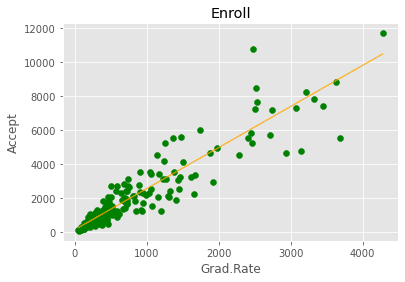

In [22]:
feature = 'Grad.Rate'
drawLine(model_2, X_test_en, y_test_en, "Enroll")

# Task 9: Mô hình hóa hồi quy tuyến tính từng đặc trưng với số lượng sinh viên được chấp nhận và trực quan hóa mô hình với dữ liệu test

R2: 0.22400751013309905
Intercept(s):  4082.934210526316


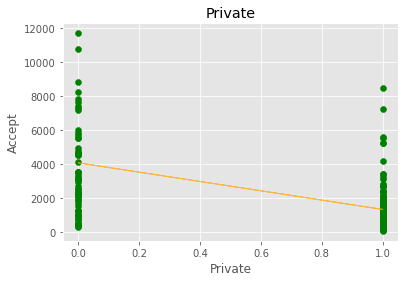

R2: 0.8278338672174985
Intercept(s):  215.6692108359373


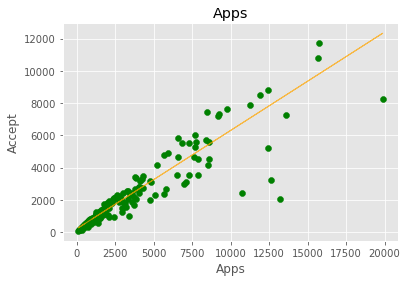

R2: 0.8578204867356156
Intercept(s):  151.72611242276275


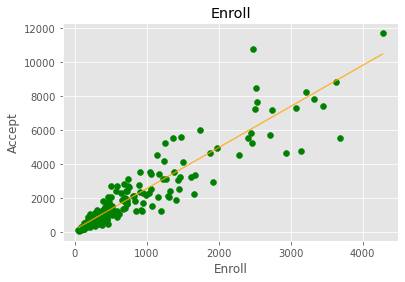

R2: 0.04653179053543455
Intercept(s):  1397.3784275961889


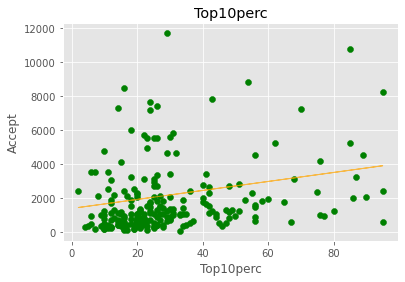

R2: 0.05631647635294579
Intercept(s):  378.8846828301894


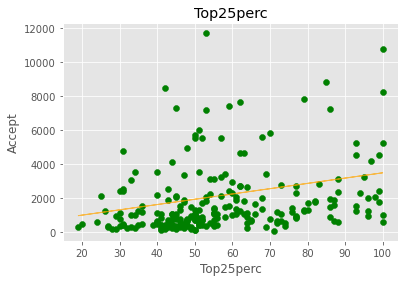

R2: 0.7779917973754006
Intercept(s):  380.9429104984281


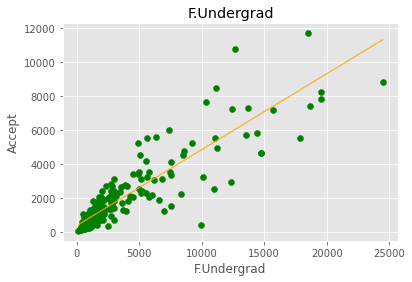

R2: 0.15365724454940088
Intercept(s):  1444.3481517491161


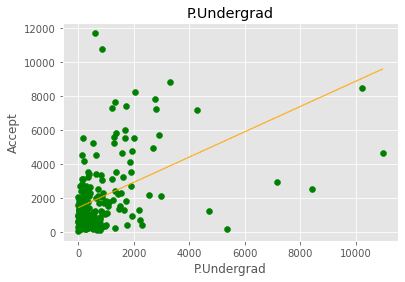

R2: -0.03441717957246193
Intercept(s):  2472.2978115697347


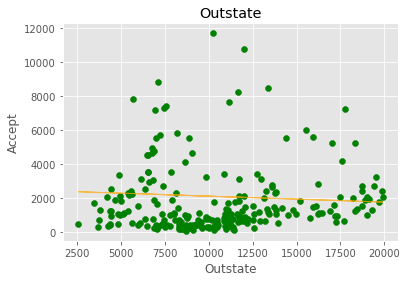

R2: -0.0026669864145500988
Intercept(s):  1340.6195651898383


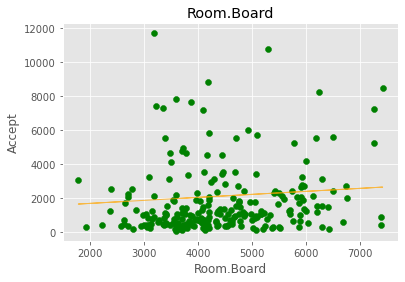

R2: 0.012015078321136241
Intercept(s):  1304.8355956198197


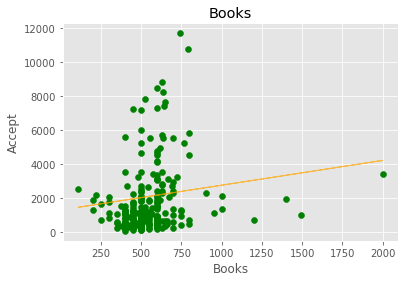

R2: 0.053082024881150325
Intercept(s):  1185.975607940944


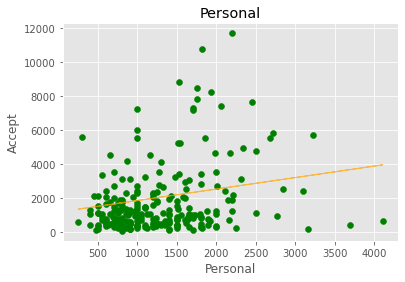

R2: 0.14442475831652213
Intercept(s):  -1901.7356825532352


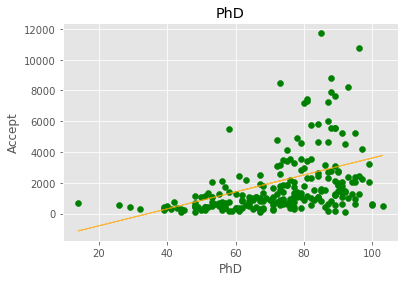

R2: 0.10721305445042717
Intercept(s):  -2566.3411230065753


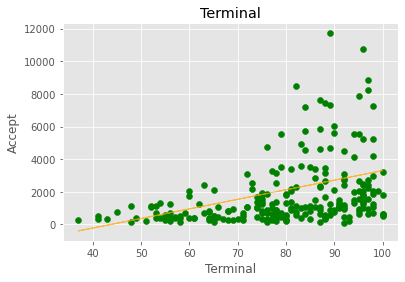

R2: -0.0012154874950456307
Intercept(s):  406.0892030188852


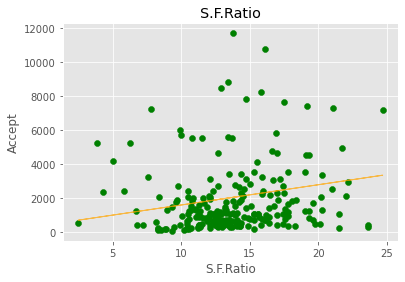

R2: 0.006075121043538134
Intercept(s):  2869.319570792186


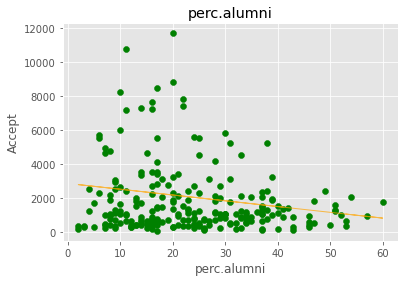

R2: 0.019419509650065114
Intercept(s):  1652.5167772242705


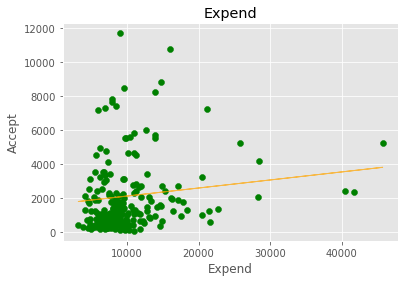

R2: -0.018954776268819362
Intercept(s):  1407.4974601852539


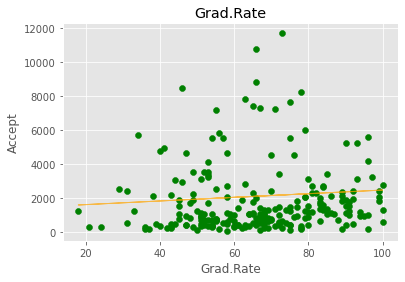

In [23]:
# Sử dụng vòng lặp for để trực quan hóa mô hình trong DataFrame
for col in X.columns:
    X_train_n = X_train[col]
    X_test_n = X_test[col]
    y_train_n = y_train
    y_test_n = y_test
    
    X_train_n = np.array(X_train_n).reshape(-1, 1)
    X_test_n = np.array(X_test_n).reshape(-1, 1)

    model_n = linear_model.LinearRegression()
    model_n.fit(X_train_n, y_train_n)
    feature = col
    drawLine(model_n, X_test_n, y_test_n, '{}'.format(col))

# Task 10: Mô hình hóa hồi quy tuyến đa biến số lượng sinh viên ghi danh cho mỗi trường đại học và chi phí ăn ở để dự đoán số lượng sinh viên được chấp nhận và trực quan mô hình

Tách dữ liệu số lượng sinh viên ghi danh cho mỗi trường đại học và chi phí ăn ở từ bộ train và test

In [24]:
X_train_T10 = X_train[['Room.Board', 'Enroll']]
X_test_T10 = X_test[['Room.Board', 'Enroll']]
y_train_T10 = y_train
y_test_T10 = y_test

Điều chỉnh shape phù hợp với đầu vào của mô hình.

Lưu ý dữ liệu của chúng ta ở phần này là 2 đặc trưng, do đó đầu vào của mô hình đối với X sẽ là (m, 2)

In [25]:
X_train_T10 = np.array(X_train_T10).reshape(-1, 2)
X_test_T10 = np.array(X_test_T10).reshape(-1, 2)

Xây dựng và huấn luyện mô hình

In [26]:
model_T10 = linear_model.LinearRegression()
model_T10.fit(X_train_T10, y_train_T10)

LinearRegression()

Đánh giá chất lượng mô hình bằng chỉ số R2 cho tập test

In [27]:
y_pred_T10 = model_T10.predict(X_test_T10)
score_T10 = r2_score(y_test_T10, y_pred_T10)
score_T10

0.8764371774214047

Trực quan mô hình với dữ liệu test

R2: 0.8764371774214047
Intercept(s):  -1176.6284824940844


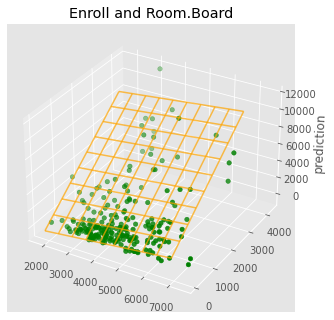

In [28]:
y_pred = y_pred_T10 
drawPlane(model_T10, X_test_T10, y_test_T10, 'Enroll and Room.Board')

# Task 11: Sử dụng hồi quy tuyến tính với toàn bộ đặc trưng để quan sát tác động của từng đặc trưng đến mục tiêu

Tạo một bản sao về dữ liệu train và test


In [29]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

Điều chỉnh shape phù hợp với đầu vào của mô hình.

Lưu ý rằng đầu vào của mô hình lúc này sẽ là (m, n).

In [30]:
y_train_copy = np.array(y_train_copy).reshape(-1, 1)
y_test_copy = np.array(y_test_copy).reshape(-1, 1)

Trong hồi quy tuyến tính, đặc trưng có miền giá trị lớn hơn sẽ chiếm ưu thế hơn so với đặc trưng có miền giá trị nhỏ hơn. Để công bằng cho tất cả đặc trưng chúng ta sẽ áp dụng một phương pháp được gọi là co dãn đặc t
trưng

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_copy)
X_test_scaled = scaler.transform(X_test_copy)

Xây dựng và huấn luyện mô hình

In [32]:
model_copy = linear_model.LinearRegression()
model_copy.fit(X_train_scaled, y_train_copy)

LinearRegression()

Đánh giá chất lượng mô hình bằng chỉ số R2 cho tập test

In [33]:
score_T11 = r2_score(y_test_copy, model_copy.predict(X_test_scaled))
score_T11

0.919628527456307

Quan sát trọng số đối với từng đặc trưng để kiểm tra xem đặc trưng nào có tác động mạnh hơn tới số lượng sinh viên được chấp nhận.

Đối chiếu trọng số của từng đặc trưng với ma trận trực quan để đối chiếu kết quả, nếu giá trị trong ma trận tương quan là dương lớn thì tham số đối với đặc trưng đó sẽ lớn và ngược lại.

In [34]:
# The coefficients: 
C = model_copy.coef_
# print(type(C))
print(C)

[[  86.338167   1788.19557888 1166.09458819 -497.68355001  152.95946613
  -153.25455768  -57.39522555  271.4371352   -12.106168     -4.99600787
   -19.55377665   86.29972289   16.6900157   -36.07871543  -62.33994749
  -160.9246618   -26.6080646 ]]


In [35]:
C = pd.DataFrame(C.T, X.columns, columns = ['Coefficients'])
C.sort_values('Coefficients', ascending = False)

,Coefficients
Apps,1788.195579
Enroll,1166.094588
Outstate,271.437135
Top25perc,152.959466
Private,86.338167
PhD,86.299723
Terminal,16.690016
Books,-4.996008
Room.Board,-12.106168
Personal,-19.553777


**Câu hỏi: Đặc trưng nào có tác động mạnh nhất đến số lượng sinh viên được chấp nhận ?**

Đặc trưng **Apps** có tác động mạnh nhất đến số lượng sinh viên được chấp nhận

**Câu hỏi: Đặc trưng nào có tác động ít nhất đến số lượng sinh viên được chấp nhận ?**

Đặc trưng **Books** có tác động ít nhất đến số lượng sinh viên được chấp nhận

# Task 12: Xây dựng mô hình hồi quy tuyến tính của riêng bạn

Tùy ý chọn đặc trưng và điều chỉnh siêu tham số

Yêu cầu: R2 score >= 0.9

In [36]:
X1 = df.drop(columns = 'Apps')
y1 = df['Apps']
X1.head() 

,Private,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [37]:
# Dữ liệu train chiếm 75% và random_state là 7
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.75, random_state = 7)

In [38]:
y1_train = np.array(y1_train).reshape(-1, 1)
y1_test = np.array(y1_test).reshape(-1, 1)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

In [40]:
my_model = linear_model.LinearRegression()
my_model.fit(X1_train, y1_train)

LinearRegression()

In [41]:
y1_pred = my_model.predict(X1_test)
score_m = r2_score(y1_test, y1_pred)
score_m

0.9027591256820613

**Câu hỏi: Hãy giải thích quá trình lý do lựa chọn đặc trưng, các tham số điều chỉnh để đạt được R2 score >= 0.9**

- Để đạt được R2 score ≥ 0.9, ta chọn các đặc trưng có giá trị ma trận tương quan lớn . Vì đặc trưng của cột Apps có những nét tương đồng với Enroll và Accept đã cho giá trị R2 score ≥ 0.9 nên được chọn.
- Dữ liệu train chiếm 75% và random_state là 7

# Task 13: Sử dụng hồi quy Lasso để chọn ra đặc trưng tốt nhất để dự đoán số lượng sinh viên được chấp nhận.


Hồi quy Lasso là hồi quy tuyến tính đặc biệt được tinh chỉnh để có thể đưa các tham số của các đặc trưng không quan trọng tiến về 0 và còn lại các đặc trưng quan trọng.

Alpha càng lớn, tham số của các đặc trưng không quan trọng càng nhỏ và tiến về 0 nhanh.

Yêu cầu: Tìm giá trị alpha sao cho mô hình đạt R2 score >= 0.9

In [42]:
# Dữ liệu train chiếm 70% và random_state là 7
X_scale = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, train_size=0.7, random_state=7)

In [43]:
# Điều chỉnh shape 
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

# Điều chỉnh co dãn đặc trưng 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
# Định nghĩa tham số, mô hình và PP đánh giá
lasso_cv = Lasso()
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
params = {"alpha" : [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]}

lasso_regressor = GridSearchCV(lasso_cv, params, scoring='neg_mean_absolute_error', cv = cv, n_jobs = -1)
results = lasso_regressor.fit(X_train_scaled, y_train)
print('Best alpha: %s' % results.best_params_)

Best alpha: {'alpha': 10.0}


Đánh giá chất lượng mô hình bằng chỉ số R2 cho tập test

In [45]:
model_ls = Lasso(alpha=10.0)
model_ls.fit(X_train, y_train)

y_pred = model_ls.predict(X_test)
score = r2_score(y_test, y_pred)
score

0.921512653841541

Quan sát tham số với từng đặc trưng để kiểm tra xem đặc trưng nào bị loại bỏ bằng phương pháp Lasso

In [46]:
# Load dữ liệu 
names = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [47]:
# Hàm lasso_df
def lasso_df(alphas):
    '''
    Đưa vào danh sách các giá trị alpha. 
    Hàm sẽ xuất ra khung dữ liệu chứa các hệ số của hồi quy lasso
    từ mỗi giá trị alpha tương ứng.
    '''
    # Tạo một Dataframe trống, với tên cột 'Feature Name' 
    df2 = pd.DataFrame()
    df2['Feature Name'] = names
    
    # Vòng lặp for cho mỗi giá trị alpha trong list giá trị alpha
    for alpha in alphas:
        
        # Tạo một hồi quy lasso với từng giá trị alpha 
        lasso = Lasso(alpha = alpha)
        
        # Điều chỉnh hồi quy lasso
        lasso.fit(X, y) 
        
        # Tạo cột dữ kiệu mới với tên gọi Alpha = (từng giá trị alpha trong alphas)
        column_name = 'Alpha = %f' % alpha
        
        # Cột Alpha... vừa tạo chứa các hệ số tương ứng
        df2[column_name] = lasso.coef_
    
    # Tiếp tục quay lại với df2 đến khi kết thúc
    return df2

In [48]:
# Triển khai hàm lasso_df vừa tạo, với best_alpha = 10
lasso_df([1e-3, 1e-2, 1, 1e1])

,Feature Name,Alpha = 0.001000,Alpha = 0.010000,Alpha = 1.000000,Alpha = 10.000000
0,Private,73.670737,73.657389,72.093204,48.967854
1,Apps,1624.931926,1624.900350,1620.679436,1602.762596
2,Enroll,1078.577652,1078.307463,1051.853964,979.160330
3,Top10perc,-487.510497,-487.408980,-476.137351,-379.949141
4,Top25perc,182.977933,182.883147,172.554435,88.920050
5,F.Undergrad,-90.604839,-90.307241,-60.280219,0.000000
6,P.Undergrad,-51.238965,-51.240281,-51.280965,-33.861961
7,Outstate,244.856005,244.822304,241.056806,214.830835
8,Room.Board,-13.102856,-13.071259,-9.450425,0.000000
9,Books,2.606060,2.591960,1.029551,0.000000


**Câu hỏi: Đặc trưng nào bị loại bỏ trong hồi quy Lasso ?**

Tại giá trị alpha = 10, các đặc trưng bị loại bỏ là ***F.Undergrad, Room.Board, Books, S.F.Ratio và Grad.Rate***